# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
#creating empty lists and counters
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


#for loop to fill in the empty list made above
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
    #error handler and skipping if there is an error
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : tukrah
Processing Record 2 of Set 1 : rosetta
City not found. Skipping...
Processing Record 3 of Set 1 : sao filipe
Processing Record 4 of Set 1 : tiksi
Processing Record 5 of Set 1 : chuy
Processing Record 6 of Set 1 : hithadhoo
Processing Record 7 of Set 1 : east london
Processing Record 8 of Set 1 : kaitangata
City not found. Skipping...
Processing Record 9 of Set 1 : ushuaia
Processing Record 10 of Set 1 : hilo
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : ilulissat
Processing Record 13 of Set 1 : saint-philippe
Processing Record 14 of Set 1 : uvalde
Processing Record 15 of Set 1 : albany
Processing Record 16 of Set 1 : isangel
Processing Record 17 of Set 1 : pokrovsk
Processing Record 18 of Set 1 : college
Processing Record 19 of Set 1 : sao felix do xingu
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 1 : san borja
Processing Record

Processing Record 38 of Set 4 : washougal
City not found. Skipping...
Processing Record 39 of Set 4 : iqaluit
Processing Record 40 of Set 4 : gorontalo
Processing Record 41 of Set 4 : kjopsvik
Processing Record 42 of Set 4 : dom pedrito
Processing Record 43 of Set 4 : saint-augustin
Processing Record 44 of Set 4 : havoysund
Processing Record 45 of Set 4 : superior
Processing Record 46 of Set 4 : vicuna
Processing Record 47 of Set 4 : batagay
Processing Record 48 of Set 4 : kendari
Processing Record 49 of Set 4 : provideniya
Processing Record 50 of Set 4 : ewa beach
Processing Record 0 of Set 5 : cherskiy
Processing Record 1 of Set 5 : granadilla de abona
Processing Record 2 of Set 5 : caravelas
Processing Record 3 of Set 5 : pierre
Processing Record 4 of Set 5 : vila franca do campo
Processing Record 5 of Set 5 : tiznit
Processing Record 6 of Set 5 : mahibadhoo
City not found. Skipping...
Processing Record 7 of Set 5 : port moresby
Processing Record 8 of Set 5 : kurilsk
Processing Reco

Processing Record 27 of Set 8 : palasa
Processing Record 28 of Set 8 : quanzhou
Processing Record 29 of Set 8 : mahebourg
Processing Record 30 of Set 8 : nanortalik
Processing Record 31 of Set 8 : surazh
Processing Record 32 of Set 8 : nanzhang
Processing Record 33 of Set 8 : dubti
Processing Record 34 of Set 8 : touros
Processing Record 35 of Set 8 : san patricio
Processing Record 36 of Set 8 : vardo
Processing Record 37 of Set 8 : tazovskiy
Processing Record 38 of Set 8 : corozal
Processing Record 39 of Set 8 : saint george
Processing Record 40 of Set 8 : devils lake
Processing Record 41 of Set 8 : pedernales
Processing Record 42 of Set 8 : hungund
Processing Record 43 of Set 8 : shangrao
Processing Record 44 of Set 8 : matagami
Processing Record 45 of Set 8 : udachnyy
Processing Record 46 of Set 8 : saint-francois
Processing Record 47 of Set 8 : kulhudhuffushi
Processing Record 48 of Set 8 : petropavlovka
Processing Record 49 of Set 8 : beringovskiy
Processing Record 50 of Set 8 : s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
#creating Data Frame with the data
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list})
# Count data
weather_dict.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [26]:
# Display the Data Frame
weather_dict

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tūkrah,32.5341,20.5791,76.66,42,31,11.99,LY,1635020152
1,Rosetta,31.4044,30.4164,71.42,64,0,7.83,EG,1635020152
2,São Filipe,14.8961,-24.4956,79.93,69,4,6.46,CV,1635020153
3,Tiksi,71.6872,128.8694,0.63,99,100,6.71,RU,1635020153
4,Chui,-33.6971,-53.4616,62.69,70,100,1.01,UY,1635020154
...,...,...,...,...,...,...,...,...,...
561,Piran,45.5278,13.5706,54.12,68,0,4.61,SI,1635020318
562,Karabulak,43.3036,44.8964,39.76,61,0,3.96,RU,1635020319
563,Kaeo,-35.1000,173.7833,63.32,98,100,10.36,NZ,1635020319
564,Pangody,65.8500,74.4859,32.38,98,100,11.21,RU,1635020319


In [27]:

#saving into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

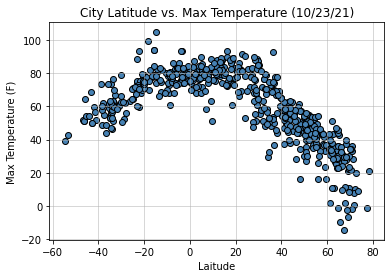

In [46]:
#creating Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

#setting title, label, grid
plt.title("City Latitude vs. Max Temperature (10/23/21)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#saving figure as png
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

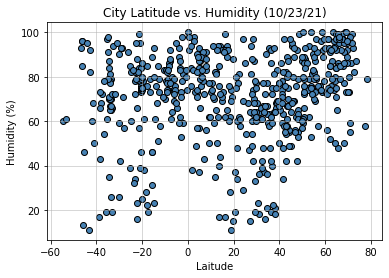

In [45]:
#creating Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

#setting title, label, grid
plt.title("City Latitude vs. Humidity (10/23/21)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#saving figure as png
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

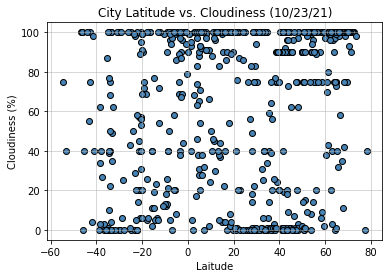

In [44]:

#creating Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

#setting title, label, limit, grid
plt.title("City Latitude vs. Cloudiness (10/23/21)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#saving figure as png
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

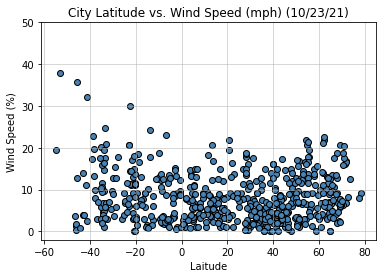

In [43]:
#creating Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

#setting title, label, limit, grid
plt.title("City Latitude vs. Wind Speed (mph) (10/23/21)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#saving figure as png
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [32]:
#creating Data Frames for Northern and Southern Hemisphere
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [16]:
#defining the linear agression function and the scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

#defining fuction for annotate
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.86


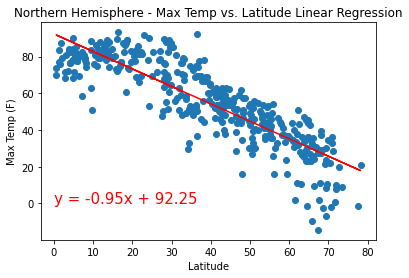

In [42]:
#using linear aggression function from above
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

#using the annotate function from above
annotate(equation, 0, 0)

#setting title and labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

#saving figure as png
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.76


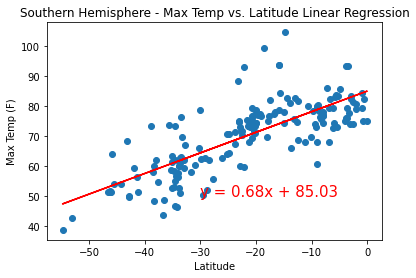

In [41]:
#using linear aggression function from above
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

#using the annotate function from above
annotate(equation, -30, 50)

#setting title and label
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

#saving figure as png
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.24


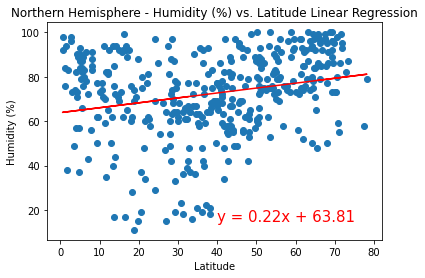

In [40]:
#using linear aggression function from above
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

#using the annotate function from above
annotate(equation, 40, 15)

#setting title and label
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#saving figure as png
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.17


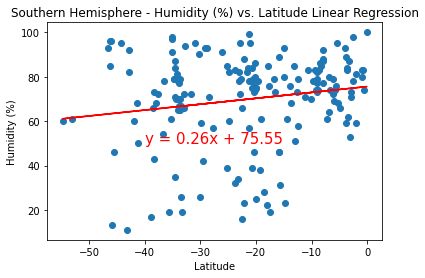

In [39]:
#using linear aggression function from above
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

#using the annotate function from above
annotate(equation, -40, 50)

#setting title and label
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#saving figure as png
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.14


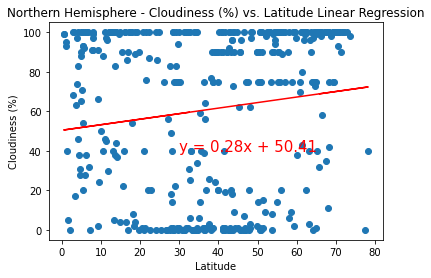

In [38]:
#using linear aggression function from above
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

#using the annotate function from above
annotate(equation, 30, 40)

#setting title and label
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#saving figure as png
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.17


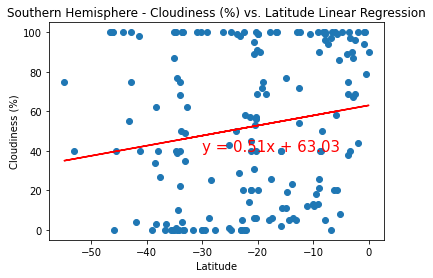

In [37]:
#using linear aggression function from above
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

#using the annotate function from above
annotate(equation, -30, 40)

#setting title and label
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#saving figure as png
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.17


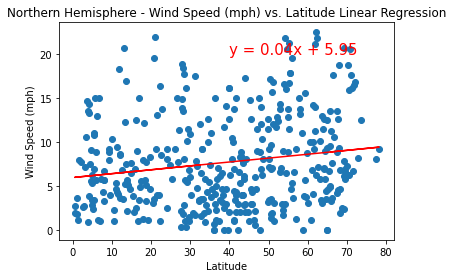

In [36]:
#using linear aggression function from above
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

#using the annotate function from above
annotate(equation, 40, 20)

#setting title and label
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#saving figure as png
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.24


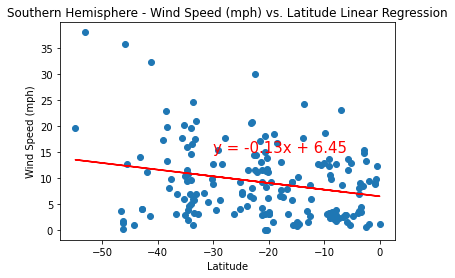

In [35]:
#using linear aggression function from above
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

#using the annotate function from above
annotate(equation, -30, 15)

#setting title and label
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#saving figure as png
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")